# TASK - 1

# MOVIE GENRE CLASSIFICATION

**Description**
Create a machine learning model that can predict the genre of a movie based on its plot summary or other textual information. You can use techniques like TF-IDF or word embeddings with classifiers such as Naive Bayes, Logistic Regression, or Support Vector
Machines.

**Data Handling**

In [1]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
# Importing required libraries

# Data Analysis libraries

import pandas as pd
import numpy as np

# Data Visualization libraries

from matplotlib import pyplot as plt
import seaborn as sbn

**Loading the trained Data-Set**

In [3]:
# loading the csv file by using pandas

trained_path=(r"C:\Users\kuruk\Downloads\MOVIE GENRE CLASSIFICATION DATASET\train_data.txt")
trained_df= pd.read_csv(trained_path, sep=":::", names=["MOVIE", "GENRE", "DESCRIPTION"], engine="python")
trained_df

,MOVIE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


**Shape of the trained dataset**

In [4]:
print('Shape of trained dataset is', trained_df.shape)

Shape of trained dataset is (54214, 3)


**columns in the trianed dataset**

In [5]:
trained_df.columns

Index(['MOVIE', 'GENRE', 'DESCRIPTION'], dtype='object')

**Data Cleaning for trained data**

In [6]:
trained_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MOVIE        54214 non-null  object
 1   GENRE        54214 non-null  object
 2   DESCRIPTION  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [7]:
trained_df.describe().T

,count,unique,top,freq
MOVIE,54214,54214,Oscar et la dame rose (2009),1
GENRE,54214,27,drama,13613
DESCRIPTION,54214,54086,Grammy - music award of the American academy ...,12


In [8]:
trained_df.isnull().sum()

MOVIE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [9]:
trained_df.duplicated().sum()

0

In [10]:
trained_df.GENRE.unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

**Loading the tested data**

In [11]:
tested_path= (r"C:\Users\kuruk\Downloads\MOVIE GENRE CLASSIFICATION DATASET\test_data.txt")
tested_df = pd.read_csv(tested_path, sep=":::", names=["MOVIE", "DESCRIPTION"], engine="python")

In [12]:
tested_df

,MOVIE,DESCRIPTION
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...
54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


In [13]:
tested_df.head()

,MOVIE,DESCRIPTION
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


In [14]:
tested_df.tail()

,MOVIE,DESCRIPTION
54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."
54200,Curitiba Zero Grau (2010),"Curitiba is a city in movement, with rhythms ..."


**Shape of the tested dataset**

In [15]:
print('Shape of the tested dataset is', tested_df.shape)

Shape of the tested dataset is (54200, 2)


**Columns in tested dataset**

In [16]:
tested_df.columns

Index(['MOVIE', 'DESCRIPTION'], dtype='object')

**Data Cleaning for tested data**

In [17]:
tested_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54200 entries, 1 to 54200
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   MOVIE        54200 non-null  object
 1   DESCRIPTION  54200 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [18]:
tested_df.describe().T

,count,unique,top,freq
MOVIE,54200,54200,Edgar's Lunch (1998),1
DESCRIPTION,54200,54072,Grammy - music award of the American academy ...,10


In [19]:
tested_df.isnull().sum()

MOVIE          0
DESCRIPTION    0
dtype: int64

In [20]:
tested_df.duplicated().sum()

0

# Exploratory Data Analysis

**About EDA :**
It is a process of describing the data by means of statistical and visualization techniques in order to bring important aspects of that data into focus for further analysis.

**Data Visualization**

In [21]:
# importing the libraries required for data visualization

import seaborn as sbn
from matplotlib import pyplot as plt


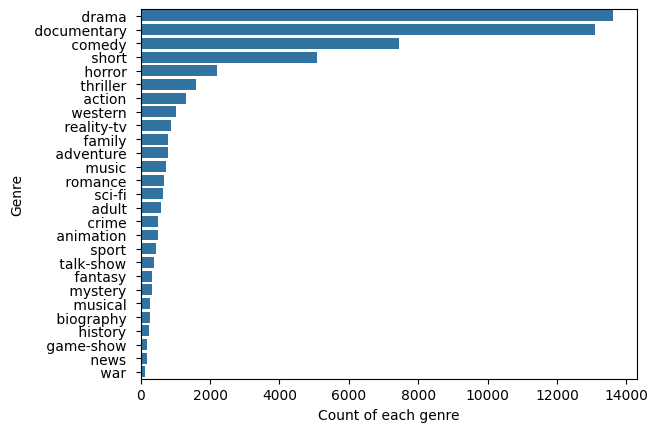

In [22]:
# Plot the distribution of genres in the trained data

sbn.countplot(data=trained_df, y='GENRE', order=trained_df['GENRE'].value_counts().index)
plt.xlabel('Count of each genre')
plt.ylabel('Genre')
plt.show()

In [23]:
trained_df['length']=trained_df['DESCRIPTION'].apply(len)

In [24]:
#count of each genre

trained_df["GENRE"].value_counts()

GENRE
drama           13613
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64

**Pre-processing the texual data**

In [25]:
# Cleaning the description using Lemmatization to simplify the text 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

stopwords_set = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(re.sub(r'[^\w\s#@\$]', '', text.lower()))
    lemmatizer = WordNetLemmatizer()
    filtered_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stopwords_set]
    return " ".join(filtered_tokens)


In [26]:
tested_df['cleaned_description'] = tested_df['DESCRIPTION'].apply(preprocess)

In [27]:
tested_df.head()

,MOVIE,DESCRIPTION,cleaned_description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",lr brane love life car apartment job especiall...
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march 1964 quico naughty child three bel...
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherd north tran...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died hasnt spoken brother 10 year serio...
5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial art superstar br...


In [28]:
trained_df["cleaned_description"] =  trained_df["DESCRIPTION"].apply(preprocess)

In [29]:
trained_df.head()

,MOVIE,GENRE,DESCRIPTION,length,cleaned_description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,listening conversation doctor parent 10yearold...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,bus empty student field trip museum natural hi...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,help unemployed father make end meet edith twi...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,film title refers unrecovered body ground zero...


In [30]:
trained_df = trained_df.drop("DESCRIPTION", axis=1)

In [31]:
trained_df.head()

,MOVIE,GENRE,length,cleaned_description
1,Oscar et la dame rose (2009),drama,546,listening conversation doctor parent 10yearold...
2,Cupid (1997),thriller,184,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,650,bus empty student field trip museum natural hi...
4,The Secret Sin (1915),drama,1082,help unemployed father make end meet edith twi...
5,The Unrecovered (2007),drama,625,film title refers unrecovered body ground zero...


In [32]:
trained_df.head()

,MOVIE,GENRE,length,cleaned_description
1,Oscar et la dame rose (2009),drama,546,listening conversation doctor parent 10yearold...
2,Cupid (1997),thriller,184,brother sister past incestuous relationship cu...
3,"Young, Wild and Wonderful (1980)",adult,650,bus empty student field trip museum natural hi...
4,The Secret Sin (1915),drama,1082,help unemployed father make end meet edith twi...
5,The Unrecovered (2007),drama,625,film title refers unrecovered body ground zero...


In [33]:
trained_df['cleaned_length']=trained_df['cleaned_description'].apply(len)

In [34]:
print("Average Length of Text Before Cleaning: ", trained_df['length'].mean())
print("Average Length of Text After Cleaning: ", trained_df['cleaned_length'].mean())

Average Length of Text Before Cleaning:  600.4524292618142
Average Length of Text After Cleaning:  405.95207879883424


In [35]:
trained_df = trained_df.drop('length', axis=1)

In [36]:
trained_df.head()

,MOVIE,GENRE,cleaned_description,cleaned_length
1,Oscar et la dame rose (2009),drama,listening conversation doctor parent 10yearold...,372
2,Cupid (1997),thriller,brother sister past incestuous relationship cu...,117
3,"Young, Wild and Wonderful (1980)",adult,bus empty student field trip museum natural hi...,386
4,The Secret Sin (1915),drama,help unemployed father make end meet edith twi...,728
5,The Unrecovered (2007),drama,film title refers unrecovered body ground zero...,421


**Label encoding**

In [37]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
trained_df['GENRE'] = label_encoder.fit_transform(trained_df['GENRE'])

# Keep only relevant columns
trained_df = trained_df[['cleaned_description', 'GENRE']]
tested_df = tested_df[['cleaned_description', 'MOVIE']]
trained_df.head(10)

,cleaned_description,GENRE
1,listening conversation doctor parent 10yearold...,8
2,brother sister past incestuous relationship cu...,24
3,bus empty student field trip museum natural hi...,1
4,help unemployed father make end meet edith twi...,8
5,film title refers unrecovered body ground zero...,8
6,quality control consists series 16mm single ta...,7
7,tough economic time max joey run idea discover...,5
8,ron petrie keanu reef troubled teen whose life...,6
9,sudden calamitous event causing great loss lif...,18
10,four high school student embark terrifying jou...,13


**Train test and split the data**

In [38]:
from sklearn.model_selection import train_test_split

# Split data into train and test datasets
train_data, test_data, train_label, test_label = train_test_split(trained_df['cleaned_description'], trained_df['GENRE'], test_size=0.2, random_state=42)

# Display the sizes of the train and test datasets
print(f'Split data into train and test data-sets')
print(f'Train dataSet Size: {len(train_data)}\nTest dataSet Size: {len(test_data)}')

Split data into train and test data-sets
Train dataSet Size: 43371
Test dataSet Size: 10843


**TF-IDF Vectorization**

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=100000)
train_data_tfidf = vectorizer.fit_transform(train_data)
test_data_tfidf = vectorizer.transform(test_data)

**importing warnings**

In [40]:
# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

# APPLYING MACHINE LEARNING MODELS

Naive Bayes, Logistic Regression and Support Vector Machines.

**Logistic Regression**

In [41]:
# Importing the Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [42]:
#fit to the model

classifier = LogisticRegression()
classifier.fit(train_data_tfidf, train_label)


LogisticRegression()

In [43]:
#making predictions

predictions = classifier.predict(test_data_tfidf)

# Print a report

print(classification_report(test_label, predictions))

# Calculate accuracy score for evaluation

accuracy = accuracy_score(test_label, predictions)
print(f"Logistic Regression Accuracy: {accuracy:.2%}")


              precision    recall  f1-score   support

           0       0.56      0.24      0.33       263
           1       0.77      0.18      0.29       112
           2       0.50      0.14      0.21       139
           3       0.40      0.02      0.04       104
           4       0.00      0.00      0.00        61
           5       0.51      0.58      0.54      1443
           6       0.25      0.02      0.03       107
           7       0.65      0.85      0.74      2659
           8       0.53      0.80      0.64      2697
           9       0.50      0.06      0.11       150
          10       0.00      0.00      0.00        74
          11       0.95      0.47      0.63        40
          12       0.00      0.00      0.00        45
          13       0.67      0.55      0.61       431
          14       0.67      0.42      0.52       144
          15       0.00      0.00      0.00        50
          16       0.00      0.00      0.00        56
          17       0.00    

**Naive Bayes Model**

In [44]:
#importing the libraries

from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import accuracy_score, classification_report


In [45]:
# fit to the model

naive_bayes_model = MultinomialNB(alpha=0.3)
naive_bayes_model.fit(train_data_tfidf, train_label)


MultinomialNB(alpha=0.3)

In [46]:
# Making Predictions

predictions = naive_bayes_model.predict(test_data_tfidf)

# Printing a  report

print(classification_report(test_label, predictions))

# Calculate accuracy score for evaluation

accuracy = accuracy_score(test_label, predictions)
print(f"Naive Bayes Accuracy: {accuracy:.2%}")


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       263
           1       1.00      0.01      0.02       112
           2       1.00      0.01      0.03       139
           3       0.00      0.00      0.00       104
           4       0.00      0.00      0.00        61
           5       0.60      0.22      0.32      1443
           6       0.00      0.00      0.00       107
           7       0.53      0.90      0.67      2659
           8       0.40      0.86      0.55      2697
           9       0.00      0.00      0.00       150
          10       0.00      0.00      0.00        74
          11       0.00      0.00      0.00        40
          12       0.00      0.00      0.00        45
          13       1.00      0.02      0.05       431
          14       0.00      0.00      0.00       144
          15       0.00      0.00      0.00        50
          16       0.00      0.00      0.00        56
          17       0.00    

**Support Vector Classifier**

In [47]:
# Importing the libraires

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split


In [48]:
# I convert this model into comment, because it takes huge time for implementation

# #fit to the model

# svc_model = SVC()
# svc_model.fit(train_data_tfidf, train_label)


In [49]:
# # Making predictions

# predictions = svc_model.predict(test_data_tfidf)

# # Printing a report

# print(classification_report(test_label, predictions))

# # 4. Calculating accuracy score for evaluation

# accuracy = accuracy_score(test_label, predictions)
# print(f"Support Vector Classifier: {accuracy:.2%}")


**Conclusion :**
    In summary, I got the logistic regression model outperformed when compared to other models in achieving a notably high accuracy score for predicting movie genres based on their descriptions.